# Fashion-MNIST

The object of study is the Fashion-Mnist dataset released
by Zalando Research.
Fashion-Mnist is a dataset of Zalando’s article images, consisting of a training set of 60000 examples and a test set of
10000 examples. Each example is a 28 × 28 grayscale image, to which a label from 0 to 9 is associated.
In fact we have 10 classes, specifically: t-shirt, top, trousers,
pullover, dress, coat, shirt, sneaker, bag and ankle boot.

So we're dealing with a multi-class image classification problem.
The objective is to find a classification algorithm capable to
reach a reasonable accuracy level.

First of all let's import some of the needed libraries, and also load the dataset.

# Import the needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Decision Tree
from sklearn import tree
import graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# k-Nearest-Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
from sklearn.svm import SVC

# PCA dimensionality reduction
from sklearn.decomposition import PCA

In [3]:
# Neural Networks

import tensorflow #the backend used by Keras (there are different beckend)
from tensorflow.keras.models import Sequential #import the type of mpdel: sequential (e.g., MLP)
from tensorflow.keras.layers import Input, Dense #simple linear layer
from tensorflow.keras.utils import to_categorical # transformation for classification labels
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Loading the Dataset and Flattening the images

The following cell loads the dataset from the given urls, and also flattens the images so to transform them from $28\times28$ matrices into numpy arrays of lenght $28\cdot28$.
Flattening is achieved by using the reshape() method.

In [4]:
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    y_train_val = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train_val = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(y_train_val), 784) # besides loadng 
                                                                                            #the data, I already flatten it into a vector
    y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(y_test), 784)

    return X_train_val, y_train_val, X_test, y_test


##Splitting the Dataset into training, validation and test sets

Let's split the dataset into training, validation and test set.

In [5]:
X_train_val, y_train_val, X_test, y_test = load_fashion_mnist()
print(f'Training-Validation Set dimension: {X_train_val.shape},\nTest Set dimension {X_test.shape}')

print('\nSplitting now train-val into 80% training and 20% validation:')

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.8, random_state=123)
print(f'Training Set dimension: {X_train.shape},\nValidation Set dimension {X_val.shape}')

Training-Validation Set dimension: (60000, 784),
Test Set dimension (10000, 784)

Splitting now train-val into 80% training and 20% validation:
Training Set dimension: (48000, 784),
Validation Set dimension (12000, 784)


# Preliminary Operations - exploring the dataset

Let's have a look at some istances from the Training Set

Classes: [0 1 2 3 4 5 6 7 8 9]

class 	 label
0 	 T-shirt/top
1 	 Trouser
2 	 Pullover
3 	 Dress
4 	 Coat
5 	 Sandal
6 	 Shirt
7 	 Sneaker
8 	 Bag
9 	 Ankle boot



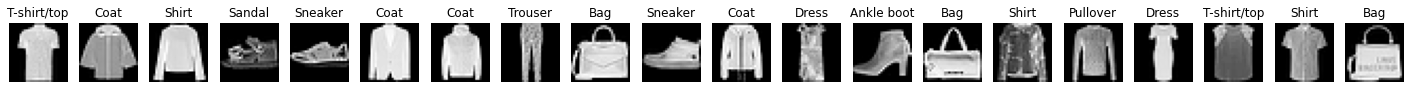

In [25]:
# number of features
num_features = X_train.shape[1]

#classes
classes = np.unique(y_train)
# number of classes
num_classes = len(classes)

# first thing we do, we check the nature of the labels: (string? int?)
print(f'Classes: {classes}\n')

# Classes are already expressed in terms of numbers, however we also want to correlate these numbers to the actual items they refer to,
# in order to do this we define the following
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# in particular we have the correspondance
print('class \t label')
for i in range(num_classes):
  print(f'{classes[i]} \t {y_labels[i]}')
print('')

# Plot random images of different classes
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = X_train[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

Before starting deploying our machine learning algorithms, let's check for classes unbalance.

In [ ]:
# Let's check for classes unbalance
for i in range(len(classes)):
  print(f'class {classes[i]}: \t {sum(y_train==classes[i])} istances')

class 0: 	 4811 istances
class 1: 	 4846 istances
class 2: 	 4802 istances
class 3: 	 4818 istances
class 4: 	 4772 istances
class 5: 	 4790 istances
class 6: 	 4830 istances
class 7: 	 4798 istances
class 8: 	 4772 istances
class 9: 	 4761 istances


Classes are perfectly balanced, so there's no need to implement Over-sampling/Under-sampling techniques.

Given that the classes are perfectly balanced and equally important, accuracy can be considered a good metric for the problem.

We now start testing some of the main machine learning algorithms. In the following:

1. Decision Tree
2. Random Forest
3. Nearest Neighbors
4. Multiclass Logistic Regression 
5. Support Vector Machine
6. Neural Network

In particular, Support Vector Machines and Multiclass Logistic Regression were only applied after dimensionality reduction, since applying them on the original dataset resulted in excessive run times.

Moreover, due to the large size of the dataset, for each algorithm we indicated 
* running time for explicit classifier 
* running time for GridSearch 

In fact we used GridSearch on the classifiers in order to find optimal values for the parameters, and then we used these optimal values to build an explicit classifier. 

(Running times refers to the running times of an Asus 2-core, RAM 8gb)

#Decision Tree 
* Running time ~ 30 seconds
* Running time gridsearch ~ 16 minutes



Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

The decisions are performed on the basis of features of the given dataset.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

Additional information can be found [here](https://scikit-learn.org/stable/modules/tree.html).

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "tree = tree.Dec...":

# param_grid = {'max_depth': [6, 12, 60, 100], 'min_samples_leaf':[2, 3]}
# tree_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=123)
# tree = GridSearchCV(tree_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3, random_state=123)

tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.8869583333333333
ACC on validation set: 0.8191666666666667
ACC on test set: 0.8123


#Random Forest

*   Running time ~ 50 seconds
*   Running time gridsearch ~ 50 minutes

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
In random forests, each tree in the ensemble is built from a sample drawn with replacement from the training set.

Additional information can be found [here](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees).

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "RF = RandomForestClass...":

# param_grid = {'n_estimators':[10, 50, 100], 'max_depth':[8, 20, 50], 'min_samples_leaf':[2,3]}
# RF_clf = RandomForestClassifier(criterion='entropy', random_state=123)
# RF = GridSearchCV(RF_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

RF = RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=20, min_samples_leaf=2, random_state=123)

RF.fit(X_train, y_train)

y_train_pred = RF.predict(X_train)
y_val_pred = RF.predict(X_val)
y_test_pred = RF.predict(X_test)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.9972291666666667
ACC on validation set: 0.8823333333333333
ACC on test set: 0.8712


# k-Nearest-Neighbors

*   Running time ~ 5 minutes
*   Running time gridsearch ~ 25 minutes

Neighbors-based classification is a type of instance-based learning, since it simply “remember” all of its training data, rather than attempting to construct a general internal model.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure.

Additional information can be found [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification).

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "KNN = KNeighborsClass...":

# param_grid = {'n_neighbors' : [5, 10, 20, 50], 'weights' : ['uniform', 'distance']}
# KNN_clf = KNeighborsClassifier(algorithm='auto', p=2, metric='minkowski', n_jobs=-1)
# KNN = GridSearchCV(KNN_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='minkowski', n_jobs=-1)

KNN.fit(X_train, y_train)

y_train_pred = KNN.predict(X_train)
y_val_pred = KNN.predict(X_val)
y_test_pred = KNN.predict(X_test)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 1.0
ACC on validation set: 0.85875
ACC on test set: 0.8543


Let's standardize the dataset and reapply the algorithm to see if there are any improvements.

In [23]:
# We tested with both a MinMaxScaler and a StandardScaler, the latter yielded better results
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "KNN = KNeighborsClass...":

# param_grid = {'n_neighbors' : [5, 10, 20, 50], 'weights' : ['uniform', 'distance']}
# KNN_clf = KNeighborsClassifier(algorithm='auto', p=2, metric='minkowski', n_jobs=-1)
# KNN = GridSearchCV(KNN_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='minkowski', n_jobs=-1)

KNN.fit(X_train_scaled, y_train)

y_train_pred = KNN.predict(X_train_scaled)
y_val_pred = KNN.predict(X_val_scaled)
y_test_pred = KNN.predict(X_test_scaled)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 1.0
ACC on validation set: 0.8603333333333333
ACC on test set: 0.852


Interestingly, we note that for the kNN the training phase is quite fast whereas the prediction phase takes much longer.
This is an inherent issue of the model, due to the fact that for each sample we want to predict the label, we have to calculate the distances from all the other 48000 samples of the training set.

#Neural Networks

*   Running time ~ 3 minutes
*   Running time gridsearch ~ 42 minutes

Neural networks are a subset of machine learning algorithms, loosely inspired by the human brain, mimicking the way that biological neurons signal to one another.

The network consists of an input layer, one or more hidden layers, and an output layer. In each layer there are several nodes, or neurons, and the nodes in each layer use the outputs of all nodes in the previous layer as inputs, such that all neurons interconnect with each other through the different layers. Each neuron typically is assigned a weight that is adjusted during the learning process and decreases or increases in the weight change the strength of that neuron’s signal.

Additional information can be found [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron).

For Neural Networks in particular, feature scaling turned out to be game-changing. To convince yourself just reapply the algorithm with the original dataset.

In [13]:
# Let's define an appropriate function which we'll use to implement a GridSearch over the Neural Networks parameters

def MLP_definer(input_size, n_classes, n_layers, n_units, activation_hid='relu', activation_out='softmax'):

  #set the random seed
  np.random.seed(123)
  set_random_seed(2)

  model=Sequential()
  model.add(Dense(input_dim = input_size, units = input_size, activation = activation_hid))
  for i in range(n_layers):
    model.add(Dense(units = n_units, activation = activation_hid))
  model.add(Dense(n_classes, activation = activation_out))

  # compile
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

  return model

In [14]:
# let's also implement a simple early stopping mechanism
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 5, #number of epochs with no improvement
                   verbose=1)

# transforming y to categorical
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
# GridSearch over number of hidden layers and number of units per hidden layer

n_layers = range(1, 5) # number of hidden layers
n_units = [25, 50, 100, 150, 300] # number of neurons per hidden layer

for n_l in n_layers:
  print(f'num layers del NN= {n_l+2}') # input layer, n_l hidden layers, output layer
  for n_u in n_units:
    print('n_units per hidden layer =',n_u)
    model = MLP_definer(num_features, num_classes, n_l, n_u, 'tanh', 'softmax')
    hst = model.fit(X_train_scaled, y_train_cat, epochs=30, batch_size=16, validation_split=0.15, callbacks=es, verbose=2)
    print(f'training ACC: {hst.history["accuracy"][-1]}\tvalidaton ACC :{hst.history["val_accuracy"][-1]}\n')

num layers del NN= 3
n_units per hidden layer = 25
Epoch 1/30
2550/2550 - 9s - loss: 0.5454 - accuracy: 0.8198 - val_loss: 0.4326 - val_accuracy: 0.8503 - 9s/epoch - 3ms/step
Epoch 2/30
2550/2550 - 8s - loss: 0.3884 - accuracy: 0.8645 - val_loss: 0.3890 - val_accuracy: 0.8618 - 8s/epoch - 3ms/step
Epoch 3/30
2550/2550 - 8s - loss: 0.3428 - accuracy: 0.8779 - val_loss: 0.3688 - val_accuracy: 0.8683 - 8s/epoch - 3ms/step
Epoch 4/30
2550/2550 - 8s - loss: 0.3132 - accuracy: 0.8891 - val_loss: 0.3603 - val_accuracy: 0.8725 - 8s/epoch - 3ms/step
Epoch 5/30
2550/2550 - 8s - loss: 0.2886 - accuracy: 0.8993 - val_loss: 0.3727 - val_accuracy: 0.8640 - 8s/epoch - 3ms/step
Epoch 6/30
2550/2550 - 8s - loss: 0.2687 - accuracy: 0.9046 - val_loss: 0.3493 - val_accuracy: 0.8747 - 8s/epoch - 3ms/step
Epoch 7/30
2550/2550 - 8s - loss: 0.2505 - accuracy: 0.9114 - val_loss: 0.3487 - val_accuracy: 0.8758 - 8s/epoch - 3ms/step
Epoch 8/30
2550/2550 - 8s - loss: 0.2353 - accuracy: 0.9170 - val_loss: 0.3487 - 

In [27]:
# best model as shown by the GridSearch
model = MLP_definer(num_features, num_classes, 1, 100, 'tanh', 'softmax')

# fitting the model
hst = model.fit(X_train_scaled, y_train_cat, epochs=30, batch_size=16, verbose=2, validation_split=0.15, callbacks=es)

# let's evaluate performances on test set
#test_results = model.evaluate(X_test_scaled, y_test_cat, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

y_train_pred = model.predict(X_train_scaled).argmax(axis = 1) 
y_val_pred = model.predict(X_val_scaled).argmax(axis = 1)
y_test_pred = model.predict(X_test_scaled).argmax(axis = 1) 

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')

Epoch 1/30
2550/2550 - 10s - loss: 0.4751 - accuracy: 0.8331 - val_loss: 0.3956 - val_accuracy: 0.8587 - 10s/epoch - 4ms/step
Epoch 2/30
2550/2550 - 9s - loss: 0.3571 - accuracy: 0.8741 - val_loss: 0.3654 - val_accuracy: 0.8662 - 9s/epoch - 3ms/step
Epoch 3/30
2550/2550 - 9s - loss: 0.3163 - accuracy: 0.8884 - val_loss: 0.3497 - val_accuracy: 0.8758 - 9s/epoch - 3ms/step
Epoch 4/30
2550/2550 - 9s - loss: 0.2888 - accuracy: 0.8983 - val_loss: 0.3350 - val_accuracy: 0.8799 - 9s/epoch - 4ms/step
Epoch 5/30
2550/2550 - 9s - loss: 0.2657 - accuracy: 0.9059 - val_loss: 0.3444 - val_accuracy: 0.8753 - 9s/epoch - 3ms/step
Epoch 6/30
2550/2550 - 9s - loss: 0.2462 - accuracy: 0.9132 - val_loss: 0.3319 - val_accuracy: 0.8804 - 9s/epoch - 3ms/step
Epoch 7/30
2550/2550 - 9s - loss: 0.2278 - accuracy: 0.9198 - val_loss: 0.3298 - val_accuracy: 0.8819 - 9s/epoch - 4ms/step
Epoch 8/30
2550/2550 - 9s - loss: 0.2124 - accuracy: 0.9252 - val_loss: 0.3359 - val_accuracy: 0.8828 - 9s/epoch - 3ms/step
Epoch 

Turns out Neural Network is the best model so far, let's have a look at the related Confusion Matrix.

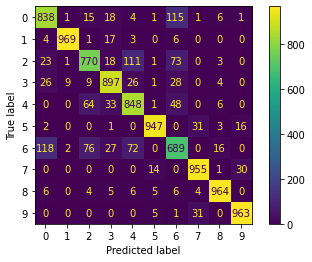

In [ ]:
y_test_pred = model.predict(X_test_scaled).argmax(axis = 1)
cm = confusion_matrix(y_test, y_test_pred, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()
plt.show()

Let's also have a look at some of the misclassified examples.

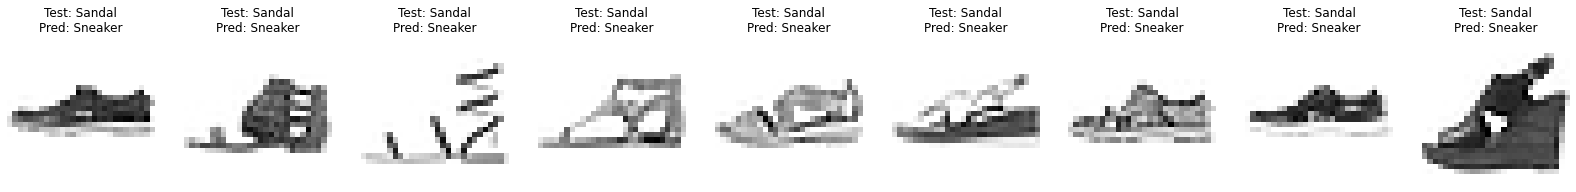

In [ ]:
indices = np.all([ (y_test==5), (y_test_pred==7) ], axis=0)
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(28, 5))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Test: {y_labels[label]}\nPred: {y_labels[pred_label]}")

These errors I'd say are quite questionable, some of those sandals actually seem sneakers. These are errors we can tolerate.
Let's have a look at the graphs for Accuracy and Loss of the model.

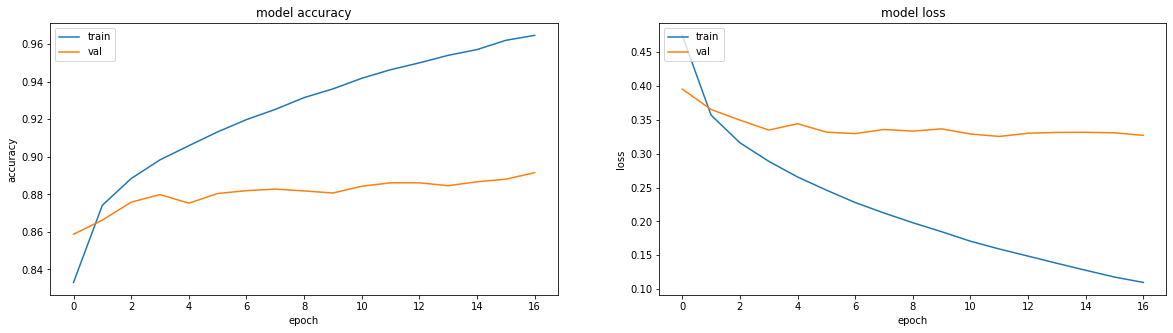

In [ ]:
plt.figure(figsize=(20, 5))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

Experimenting with even a larger number of epochs we see that Validation Accuracy keeps swinging around the same tresholds, whereas Validation Loss starts increasing after a while. Remove the Early Stopping to check it for yourself.

# Dimensionality Reduction

Let's try to get better scores via feature reduction. In particular we experimented with:

1.   Principal Component Analysis
2.   Histogram of Oriented Gradients

# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique which uses Singular Value Decomposition of the training set matrix to reduce the number of features. We can specify how many components we want to keep.

Additional information can be found [here](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca).

In [18]:
n_feats = 150 # number of features after dimensionality reduction
pca = PCA(n_components=n_feats, random_state=123)
pca.fit(X_train)
X_train_pca  = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f'number of features after PCA: {X_train.shape[1]} -> {X_train_pca.shape[1]}')

number of features after PCA: 784 -> 150


Let's test again the previous models after having applied PCA.

## Decision Tree
* running time ~ 1 minutes
* running time gridsearch ~ 15 minutes

In [ ]:
from sklearn import tree

# To use GridSearch un-comment the following 3 lines and comment "tree = tree.Dec...":

# param_grid = {'max_depth': [6, 12, 60, 100], 'min_samples_leaf':[2, 3]}
# tree_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=123)
# tree = GridSearchCV(tree_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3, random_state=123)

tree.fit(X_train_pca, y_train)

y_train_pred = tree.predict(X_train_pca)
y_val_pred = tree.predict(X_val_pca)
y_test_pred = tree.predict(X_test_pca)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.8762291666666666
ACC on validation set: 0.7879166666666667
ACC on test set: 0.7853


## Random Forest
* running time ~ 3 minutes
* running time gridsearch ~ 20 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "RF = RandomForestClass...":

# param_grid = {'n_estimators':[10, 50, 100], 'max_depth':[8, 20, 50], 'min_samples_leaf':[2,3]}
# RF_clf = RandomForestClassifier(criterion='entropy', random_state=123)
# RF = GridSearchCV(RF_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

RF = RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=20, min_samples_leaf=2, random_state=123)

RF.fit(X_train_pca, y_train)

y_train_pred = RF.predict(X_train_pca)
y_val_pred = RF.predict(X_val_pca)
y_test_pred = RF.predict(X_test_pca)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.9986458333333333
ACC on validation set: 0.8645833333333334
ACC on test set: 0.855


## k-Nearest-Neighbors
* running time ~ 3 minutes
* running time gridsearch ~ 11 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "KNN = KNeighborsClass...":

# param_grid = {'n_neighbors' : [5, 10, 20, 50], 'weights' : ['uniform', 'distance']}
# KNN_clf = KNeighborsClassifier(algorithm='auto', p=2, metric='minkowski', n_jobs=-1)
# KNN = GridSearchCV(KNN_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='minkowski', n_jobs=-1)

KNN.fit(X_train_pca, y_train)

y_train_pred = KNN.predict(X_train_pca)
y_val_pred = KNN.predict(X_val_pca)
y_test_pred = KNN.predict(X_test_pca)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 1.0
ACC on validation set: 0.86225
ACC on test set: 0.8609


Again, let us scale the data. We'll use a StandardScaler since it provides better results.

In [19]:
#scaler_minmax = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train_pca)
X_train_pca_scaled = scaler.transform(X_train_pca)
X_val_pca_scaled = scaler.transform(X_val_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

## Multinomial Logistic Regression
* running time ~ 3 minutes
* running time gridsearch ~ 1h and 10 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "LR = LogisticRegression...":

# param_grid = {'solver' : ['liblinear', 'saga'], 'C' : [0.1, 1, 10], 'penalty' : ['l1', 'l2']}
# LR_clf = LogisticRegression(tol=0.001, fit_intercept=True, random_state=123, max_iter=100, multi_class='auto')
# LR = GridSearchCV(LR_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

LR = LogisticRegression(penalty='l2', C=10 ,tol=0.001, fit_intercept=True, random_state=123, solver='saga', max_iter=2000, multi_class='auto', verbose=3, n_jobs=-1)

LR.fit(X_train_pca_scaled, y_train)

y_train_pred = LR.predict(X_train_pca_scaled)
y_val_pred = LR.predict(X_val_pca_scaled)
y_test_pred = LR.predict(X_test_pca_scaled)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 284 epochs took 205 seconds

ACC on training set: 0.8634583333333333
ACC on validation set: 0.8578333333333333
ACC on test set: 0.8428


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.4min finished


## Support Vector Machine
* running time ~ 7 minutes
* running time gridsearch ~ longer than 2 hours. Aborted.

In [ ]:
# We tried GridSearch with the following parameters grid, but we had to stop because it was taking longer than 2 hours
# param_grid = {'C':[0.1, 1, 10], 'kernel':['linear', 'poly', 'rbf'], 'degree':[2,3]}
# svm_clf = SVC(tol=0.001, cache_size=2000, random_state=123)
# svm = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

svm = SVC(C=10, kernel='rbf', tol=0.001, cache_size=4000, random_state=123)

svm.fit(X_train_pca_scaled, y_train)

y_train_pred = svm.predict(X_train_pca_scaled)
y_val_pred = svm.predict(X_val_pca_scaled)
y_test_pred = svm.predict(X_test_pca_scaled)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.9988125
ACC on validation set: 0.8995833333333333
ACC on test set: 0.8957


These are the best scores we obtained so far! SVM outperformed Neural Networks.
Let's have a look at the confusion matrix of the model.

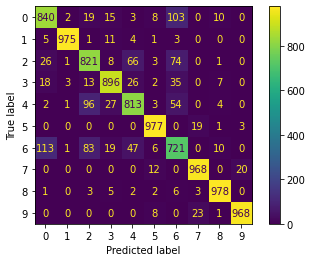

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()
plt.show()

Let's also have a look at some of the misclassified examples.

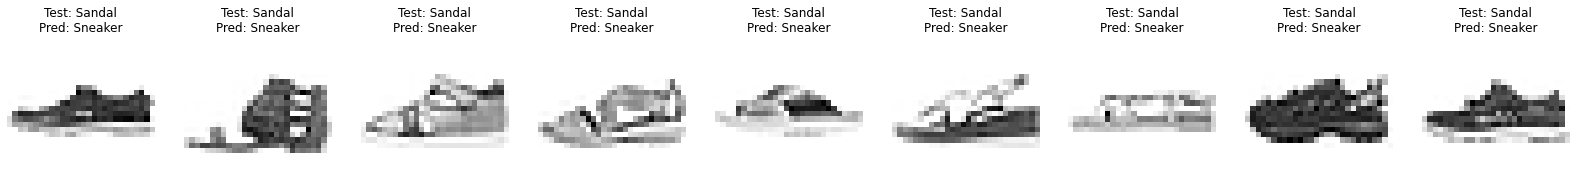

In [ ]:
indices = np.all([ (y_test==5), (y_test_pred==7) ], axis=0)
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(28, 5))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Test: {y_labels[label]}\nPred: {y_labels[pred_label]}")

Again, these errors are quite questionable. These are errors we can tolerate.

## Neural Network
* running time ~ 4 minutes
* running time gridsearch ~ 40 minutes

In [20]:
#needed parameter for the model
num_features = X_train_pca.shape[1]

In [ ]:
# GridSearch over number of hidden layers and number of units per layer

n_layers = range(1, 5) # number hidden layers
n_units = [25, 50, 100, 150, 300] # number of neurons per hidden layer

for n_l in n_layers:
  print(f'num layers del NN= {n_l+2}')
  for n_u in n_units:
    print('n_units per hidden layer =',n_u)
    model = MLP_definer(num_features, num_classes, n_l, n_u, 'tanh', 'softmax')
    hst = model.fit(X_train_pca_scaled, y_train_cat, epochs=30, batch_size=16, validation_split=0.15, callbacks=es, verbose=2)
    print(f'training ACC: {hst.history["accuracy"][-1]}\tvalidaton ACC :{hst.history["val_accuracy"][-1]}\n')

num layers del NN= 3
n_units per hidden layer = 25
Epoch 1/30
2550/2550 - 8s - loss: 0.8716 - accuracy: 0.7409 - val_loss: 0.5103 - val_accuracy: 0.8335 - 8s/epoch - 3ms/step
Epoch 2/30
2550/2550 - 7s - loss: 0.4591 - accuracy: 0.8454 - val_loss: 0.4473 - val_accuracy: 0.8467 - 7s/epoch - 3ms/step
Epoch 3/30
2550/2550 - 7s - loss: 0.4104 - accuracy: 0.8578 - val_loss: 0.4251 - val_accuracy: 0.8515 - 7s/epoch - 3ms/step
Epoch 4/30
2550/2550 - 7s - loss: 0.3814 - accuracy: 0.8666 - val_loss: 0.4119 - val_accuracy: 0.8519 - 7s/epoch - 3ms/step
Epoch 5/30
2550/2550 - 7s - loss: 0.3596 - accuracy: 0.8741 - val_loss: 0.4019 - val_accuracy: 0.8546 - 7s/epoch - 3ms/step
Epoch 6/30
2550/2550 - 7s - loss: 0.3408 - accuracy: 0.8808 - val_loss: 0.3948 - val_accuracy: 0.8576 - 7s/epoch - 3ms/step
Epoch 7/30
2550/2550 - 7s - loss: 0.3248 - accuracy: 0.8861 - val_loss: 0.3886 - val_accuracy: 0.8600 - 7s/epoch - 3ms/step
Epoch 8/30
2550/2550 - 7s - loss: 0.3103 - accuracy: 0.8909 - val_loss: 0.3830 - 

In [22]:
# best model as shown by the GridSearch
model = MLP_definer(num_features, num_classes, 1, 150, 'tanh', 'softmax')

# fitting the model
hst = model.fit(X_train_pca_scaled, y_train_cat, epochs=30, batch_size=16, verbose=2, validation_split=0.15, callbacks=[es])

# let's evaluate performances on test set
#test_results = model.evaluate(X_test_pca_scaled, y_test_cat, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

y_train_pred = model.predict(X_train_pca_scaled).argmax(axis = 1) 
y_val_pred = model.predict(X_val_pca_scaled).argmax(axis = 1)
y_test_pred = model.predict(X_test_pca_scaled).argmax(axis = 1) 

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')

Epoch 1/30
2550/2550 - 4s - loss: 0.7537 - accuracy: 0.7671 - val_loss: 0.4721 - val_accuracy: 0.8411 - 4s/epoch - 2ms/step
Epoch 2/30
2550/2550 - 4s - loss: 0.4353 - accuracy: 0.8486 - val_loss: 0.4286 - val_accuracy: 0.8525 - 4s/epoch - 1ms/step
Epoch 3/30
2550/2550 - 4s - loss: 0.3979 - accuracy: 0.8608 - val_loss: 0.4131 - val_accuracy: 0.8569 - 4s/epoch - 2ms/step
Epoch 4/30
2550/2550 - 4s - loss: 0.3732 - accuracy: 0.8681 - val_loss: 0.4042 - val_accuracy: 0.8571 - 4s/epoch - 2ms/step
Epoch 5/30
2550/2550 - 4s - loss: 0.3524 - accuracy: 0.8758 - val_loss: 0.3956 - val_accuracy: 0.8597 - 4s/epoch - 2ms/step
Epoch 6/30
2550/2550 - 4s - loss: 0.3340 - accuracy: 0.8822 - val_loss: 0.3863 - val_accuracy: 0.8637 - 4s/epoch - 2ms/step
Epoch 7/30
2550/2550 - 4s - loss: 0.3166 - accuracy: 0.8878 - val_loss: 0.3811 - val_accuracy: 0.8675 - 4s/epoch - 1ms/step
Epoch 8/30
2550/2550 - 4s - loss: 0.3008 - accuracy: 0.8942 - val_loss: 0.3755 - val_accuracy: 0.8676 - 4s/epoch - 2ms/step
Epoch 9/

So after applying PCA, SVM resulted in the best model, achieving the best scores so far!

Let's move on and apply HOG to see if we can do any better.

#Histogram of Oriented Gradients

HOG, or Histogram of Oriented Gradients, is a feature descriptor that is often used to extract features from image data. It is widely used in computer vision tasks for object detection. In our case we used it as a mean of dimensionality reduction.

Additional information can be found [here](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/).

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.feature import hog


class Flatter(BaseEstimator, TransformerMixin):
    """
    Flat an image from 3D to 2D
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array(X).reshape(len(X), -1)

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [8]:
# #define a pipeline for the preprocessing
preprocessing = Pipeline([
    ('hog', HogTransformer()),
    ('flatter', Flatter()) 
])

In [9]:
X_train_prep = preprocessing.fit_transform(X_train.reshape(X_train.shape[0],28,28))
X_val_prep = preprocessing.fit_transform(X_val.reshape(X_val.shape[0],28,28))
X_test_prep = preprocessing.fit_transform(X_test.reshape(X_test.shape[0],28,28))

In [ ]:
print(f'number of features after HOG: {X_train.shape[1]} -> {X_train_prep.shape[1]}')

number of features after HOG: 784 -> 81


Let's test again the previous models after having applied HOG.

## Decision Tree
* running time ~ 30 seconds
* running time gridsearch ~ 8 minutes

In [ ]:
from sklearn import tree

# To use GridSearch un-comment the following 3 lines and comment "tree = tree.Dec...":

# param_grid = {'max_depth': [6, 12, 60, 100], 'min_samples_leaf':[2, 3]}
# tree_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=123)
# tree = GridSearchCV(tree_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3, random_state=123)

tree.fit(X_train_prep, y_train)

y_train_pred = tree.predict(X_train_prep)
y_val_pred = tree.predict(X_val_prep)
y_test_pred = tree.predict(X_test_prep)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.8368125
ACC on validation set: 0.7469166666666667
ACC on test set: 0.7373


## Random Forest
* running time ~ 3 minutes
* running time gridsearch ~ 55 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "RF = RandomForestClass...":

# param_grid = {'n_estimators':[10, 50, 100], 'max_depth':[8, 20, 50], 'min_samples_leaf':[2,3]}
# RF_clf = RandomForestClassifier(criterion='entropy', random_state=123)
# RF = GridSearchCV(RF_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

RF = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=50, min_samples_leaf=2, random_state=123)

RF.fit(X_train_prep, y_train)

y_train_pred = RF.predict(X_train_prep)
y_val_pred = RF.predict(X_val_prep)
y_test_pred = RF.predict(X_test_prep)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.9989166666666667
ACC on validation set: 0.8415
ACC on test set: 0.8272


## k-Nearest-Neighbors
* running time ~ 2 minutes
* running time gridsearch ~ 11 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "KNN = KNeighborsClass...":

# param_grid = {'n_neighbors' : [5, 10, 20, 50], 'weights' : ['uniform', 'distance']}
# KNN_clf = KNeighborsClassifier(algorithm='auto', p=2, metric='minkowski', n_jobs=-1)
# KNN = GridSearchCV(KNN_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

KNN = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', p=2, metric='minkowski', n_jobs=-1)

KNN.fit(X_train_prep, y_train)

y_train_pred = KNN.predict(X_train_prep)
y_val_pred = KNN.predict(X_val_prep)
y_test_pred = KNN.predict(X_test_prep)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 1.0
ACC on validation set: 0.84625
ACC on test set: 0.8324


Just as we did before, let's standardize the data.

In [10]:
scaler = StandardScaler()
scaler.fit(X_train_prep)
X_train_prep_scaled = scaler.transform(X_train_prep)
X_val_prep_scaled = scaler.transform(X_val_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

## Multinomial Logistic Regression
* running time ~ 1 minutes
* running time gridsearch ~ 24 minutes

In [ ]:
# To use GridSearch un-comment the following 3 lines and comment "LR = LogisticRegression...":

# param_grid = {'solver' : ['liblinear', 'saga'], 'C' : [0.1, 1, 10], 'penalty' : ['l1', 'l2']}
# LR_clf = LogisticRegression(tol=0.001, fit_intercept=True, random_state=123, max_iter=100, multi_class='auto')
# LR = GridSearchCV(LR_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

LR = LogisticRegression(penalty='l2', C=1 ,tol=0.001, fit_intercept=True, random_state=123, solver='saga', max_iter=2000, multi_class='auto', verbose=3, n_jobs=-1)

LR.fit(X_train_prep_scaled, y_train)

y_train_pred = LR.predict(X_train_prep_scaled)
y_val_pred = LR.predict(X_val_prep_scaled)
y_test_pred = LR.predict(X_test_prep_scaled)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 152 epochs took 40 seconds

ACC on training set: 0.8238541666666667
ACC on validation set: 0.8293333333333334
ACC on test set: 0.8154


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.4s finished


## Support Vector Machine
* running time ~ 4 minutes
* running time gridsearch ~ 2h

In [ ]:
# We tried GridSearch with the following parameters grid
# param_grid = {'C':[0.1, 1, 10], 'kernel':['linear', 'poly', 'rbf'], 'degree':[2,3]}
# svm_clf = SVC(tol=0.001, cache_size=2000, random_state=123)
# svm = GridSearchCV(svm_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

svm = SVC(C=10, kernel='rbf', tol=0.001, cache_size=4000, random_state=123)

svm.fit(X_train_prep_scaled, y_train)

y_train_pred = svm.predict(X_train_prep_scaled)
y_val_pred = svm.predict(X_val_prep_scaled)
y_test_pred = svm.predict(X_test_prep_scaled)

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')


ACC on training set: 0.9730833333333333
ACC on validation set: 0.8685833333333334
ACC on test set: 0.8557


## Neural Networks
* running time ~ 4 minutes
* running time gridsearch ~ 40 minutes

In [11]:
#needed parameter for the model
num_features = X_train_prep.shape[1]

In [ ]:
# GridSearch over number of hidden layers and number of units per layer

n_layers = range(1, 5) # number hidden layers
n_units = [25, 50, 100, 150, 300] # number of neurons per hidden layer

for n_l in n_layers:
  print(f'num layers del NN= {n_l+2}')
  for n_u in n_units:
    print('n_units per hidden layer =',n_u)
    model = MLP_definer(num_features, num_classes, n_l, n_u, 'tanh', 'softmax')
    hst = model.fit(X_train_prep_scaled, y_train_cat, epochs=30, batch_size=16, validation_split=0.15, callbacks=es, verbose=2)
    print(f'training ACC: {hst.history["accuracy"][-1]}\tvalidaton ACC :{hst.history["val_accuracy"][-1]}\n')

num layers del NN= 3
n_units per hidden layer = 25
Epoch 1/30
2550/2550 - 4s - loss: 0.7894 - accuracy: 0.7324 - val_loss: 0.5915 - val_accuracy: 0.7856 - 4s/epoch - 2ms/step
Epoch 2/30
2550/2550 - 3s - loss: 0.5478 - accuracy: 0.8018 - val_loss: 0.5332 - val_accuracy: 0.8015 - 3s/epoch - 1ms/step
Epoch 3/30
2550/2550 - 3s - loss: 0.5040 - accuracy: 0.8165 - val_loss: 0.5057 - val_accuracy: 0.8108 - 3s/epoch - 1ms/step
Epoch 4/30
2550/2550 - 3s - loss: 0.4788 - accuracy: 0.8249 - val_loss: 0.4930 - val_accuracy: 0.8161 - 3s/epoch - 1ms/step
Epoch 5/30
2550/2550 - 3s - loss: 0.4607 - accuracy: 0.8302 - val_loss: 0.4806 - val_accuracy: 0.8210 - 3s/epoch - 1ms/step
Epoch 6/30
2550/2550 - 3s - loss: 0.4468 - accuracy: 0.8354 - val_loss: 0.4692 - val_accuracy: 0.8304 - 3s/epoch - 1ms/step
Epoch 7/30
2550/2550 - 3s - loss: 0.4345 - accuracy: 0.8397 - val_loss: 0.4634 - val_accuracy: 0.8310 - 3s/epoch - 1ms/step
Epoch 8/30
2550/2550 - 3s - loss: 0.4246 - accuracy: 0.8425 - val_loss: 0.4576 - 

In [17]:
# best model as shown by the GridSearch
model = MLP_definer(num_features, num_classes, 3, 300, 'tanh', 'softmax')

# fitting the model
hst = model.fit(X_train_prep_scaled, y_train_cat, epochs=30, batch_size=16, verbose=2, validation_split=0.1, callbacks=[es])

# let's evaluate performances on test set
#test_results = model.evaluate(X_test_prep_scaled, y_test_cat, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

y_train_pred = model.predict(X_train_prep_scaled).argmax(axis = 1) 
y_val_pred = model.predict(X_val_prep_scaled).argmax(axis = 1)
y_test_pred = model.predict(X_test_prep_scaled).argmax(axis = 1) 

print(f'\nACC on training set: {accuracy_score(y_train, y_train_pred)}\nACC on validation set: {accuracy_score(y_val, y_val_pred)}\nACC on test set: {accuracy_score(y_test, y_test_pred)}')

Epoch 1/30
2700/2700 - 7s - loss: 0.6167 - accuracy: 0.7769 - val_loss: 0.5273 - val_accuracy: 0.8062 - 7s/epoch - 3ms/step
Epoch 2/30
2700/2700 - 6s - loss: 0.4969 - accuracy: 0.8163 - val_loss: 0.4839 - val_accuracy: 0.8225 - 6s/epoch - 2ms/step
Epoch 3/30
2700/2700 - 6s - loss: 0.4672 - accuracy: 0.8254 - val_loss: 0.4830 - val_accuracy: 0.8231 - 6s/epoch - 2ms/step
Epoch 4/30
2700/2700 - 7s - loss: 0.4445 - accuracy: 0.8340 - val_loss: 0.4520 - val_accuracy: 0.8360 - 7s/epoch - 2ms/step
Epoch 5/30
2700/2700 - 7s - loss: 0.4276 - accuracy: 0.8401 - val_loss: 0.4458 - val_accuracy: 0.8358 - 7s/epoch - 2ms/step
Epoch 6/30
2700/2700 - 7s - loss: 0.4125 - accuracy: 0.8461 - val_loss: 0.4403 - val_accuracy: 0.8388 - 7s/epoch - 2ms/step
Epoch 7/30
2700/2700 - 6s - loss: 0.3998 - accuracy: 0.8511 - val_loss: 0.4258 - val_accuracy: 0.8404 - 6s/epoch - 2ms/step
Epoch 8/30
2700/2700 - 6s - loss: 0.3874 - accuracy: 0.8551 - val_loss: 0.4158 - val_accuracy: 0.8454 - 6s/epoch - 2ms/step
Epoch 9/

So HOG wasn't able to make any major improvement, unlike PCA. 

We stress the fact that HOG is not a proper dimensionality reduction technique, although we used it as such. 

In the end, SVM (after feature reduction via PCA) provided the best results.

# Conclusions

With this notebook we focused on the image classification problem proposed by the Zalando Fashion-Mnist dataset.
We tackled the problem with some of the main supervised learning algorithms and we found out Neural Networks to be the best model, achieving an accuracy score of 0.9645 on training set, 0.8936 on validation set, 0.884 on test set.

During this process we also came to realise how impactful the size of the dataset actually is, considering algorithms such as SVM and Multinomial Logistic Regression were basically impractible due to excessive run times.

This led us to experiment with alternative strategies, such as PCA and HOG.

After reducing the number of features we were able to successfully implement even SVM and Multinomial Logistic Regression. In particular after applying PCA, SVM resulted in the best model, obtaining an accuracy score of 0.9988 on training set, 0.8996 on validation set, 0.8957 on test set.


Ultimately this is the best we could do, we couldn't surpass 89.57% accuracy on test set, even though using Convolutional Neural Networks one can easily achieve a 93%. We omitted this latter approach though, considering it's something we'll analyze during the second semester.